In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

In [2]:
df = pd.read_csv('3D MOT Power against Brightness.csv')

In [3]:
y_new = df.iloc[:,1]

In [4]:
# 250508 Plotting nice latex style
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7


In [6]:
def number_of_atoms(photodiode_voltage_in_mV):
    P_v = photodiode_voltage_in_mV * 1e-3 # V #Photodiode signal
    P_r = 680*10**(3) # ohm
    Respons = 0.15
    c = 299792458 #m/s
    h = 6.62607015*10**(-34)# Joule*second
    wavelength = 460.862022*10**(-9)
    f = c/wavelength# m/s
    gamma = 2*np.pi*30.41*10**(6) #The natural linewidth of the transition
    I_Isat = 0.9
    detune = -60e6 #Hz detuning of the 3D MOT beam


    P_I = P_v/P_r
    P_P = P_I/Respons
    E = h*f 
    r_p=P_P/E
    R = gamma/2*I_Isat/(1+I_Isat+4*detune**2/gamma**2)
    N_pd = r_p/R 

    r_sqre = (12.7*10**(-3)/2)**2
    d = 0.15

    A = np.pi*r_sqre
    Omega = A/d**2


    N_r = N_pd*4*np.pi/Omega

    return N_r

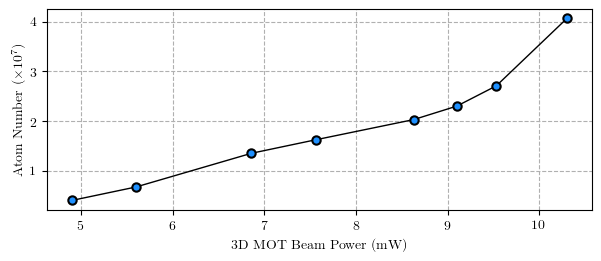

In [8]:
plt.plot(df.iloc[:,0],[number_of_atoms(i)/1e7 for i in y_new],'ko-')
# plt.xticks([100,150,200,250,300])

plt.xlabel('3D MOT Beam Power (mW)')
plt.ylabel(r"Atom Number ($\times$10$^7$)")

# plt.savefig('Push_Power_Brightness_Signal.pdf', dpi=300)
plt.savefig('3D_Power_Brightness_Signal.pdf', dpi=300)

In [5]:
## On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:

import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


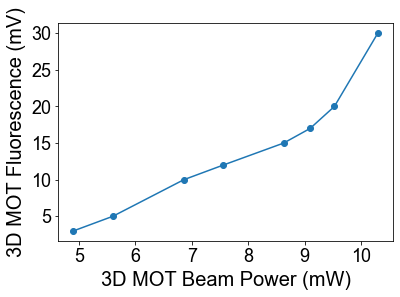

In [7]:
# plt.figure(figsize=(8,6))
plt.plot(df.iloc[:,0],y_new)
plt.scatter(df.iloc[:,0],y_new, label="Number of Atoms in the 3D MOT")

#plt.scatter(locked_resistance,locked_current,c='k',s=2,label='Locked')
# plt.legend()
plt.xlabel('3D MOT Beam Power (mW)')
plt.ylabel("3D MOT Fluorescence (mV)")
# plt.title('The Maximum Number of Atoms in the 3D MOT against Different 3D MOT Beam Powers')

# plt.show()

plt.savefig('3D_Power_Brightness_Signal.png', dpi=300, bbox_inches='tight')
plt.savefig('3D_Power_Brightness_Signal.pdf', dpi=300, bbox_inches='tight')